# <span style='color:Red'> Sensitivity Test </span>

## Refilling of Mediterranean filled upto the Sicily sill during latest Messinian

Same concepts used in Script 1 are used here.
Immediately before Mediterranean-Atlantic reconnection, basin level is set to 430 m below Atlantic level.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd

## Setting parameters

Here we begin with a shallower sill depth, and allow the incision channel to widen upto 10 km at the end of refilling episode.
Channel width coefficient has been updated to a higher value accordingly.

In [2]:
D_sill = 5      # Starting sill depth [m]
Z0 = 0           # Atlantic level [m]
DMar = 1027      # Seawater density [kg m^-3]
g = 9.81         # Acceleration due to gravity [m s^-2]
Kb = 1.8*10**-4  # Shear stress law constant [m yr^-1 Pa^-a]
L = 100000       # Length of the erosive channel [m]
H = 1000         # Head loss - set to 1000 m which is equal to present Alboran Sea depth
S = H/L
a = 1.5          # Shear stress power law exponent 
t = 1            # Starting time [days]
SL_wMed = 430    # wMed level [m]
SL_eMed = 430    # eMed level [m]
n = 0.05

Kw = 4.3         # Channel width coefficient [m^-1/2 s^1/2]
Aw = 0.5         # empirically determined constant
Wsill = 300      # Starting sill width [m]

# Arrays used for plotting parameters
Ar_SWd = [300]    # Stores sill width
Ar_t   = [0]      # Stores time
Ar_VwM = [0]      # Stores flow velocity entering wMed 
Ar_dis = [0]      # Stores flood discharge
Ar_eR  = [0]      # Stores rate of erosion
Ar_SLw = [430]  # Stores rise of sealevel in wMed
Ar_KEw = [0]      # Stores flow energy in wMed


# Arrays used to calculate correct sea level
x0=[0]
y0=[0]

#Volumes
Vbrine3 = 2797.703632 # Total volume of Mediterranean at the level of Sicily sill: Obtained from hypsometry


In [3]:
# Defines a function to calculate common parameters for each flood stage
def Calc_common_parameters(Wsill,Z0,DMar,g,D_sill,Slope,Kb,a):
    AreaSill = Wsill * D_sill                    # Sill area                  
    Rh = D_sill - Z0                             # Hydraulic radius
    v_wMed = (1/n)*(Rh**(2/3))*(Slope**(0.5))    # wMed flow velocity
    Q = v_wMed*AreaSill                          # Discharge 
    Shear = DMar*g*D_sill*Slope                  # Basal shear stress
    Erate = Kb*(Shear**a)                        # Rate of erosion
    Qd = Q*3600*24/10**12                        # Daily discharge
    return [AreaSill, Rh, v_wMed, Q, Shear, Erate, Qd]

In [4]:
# A function to append results into arrays for plotting
def append_parameters(Wsill,t,v_wMed,Q,Erate,SL_wMed,KEwMed):
        Ar_SWd.append(Wsill)
        Ar_t.append(t)
        Ar_VwM.append(v_wMed)
        Ar_dis.append(Q)
        Ar_eR.append(Erate/365)
        Ar_SLw.append(SL_wMed)
        Ar_KEw.append(KEwMed)
        return[Ar_SWd,Ar_t,Ar_VwM,Ar_dis,Ar_eR,Ar_SLw,Ar_KEw]

## Evolution of parameters

Here we assume that wMed was reconnected with the Atlantic in a single-stage refilling event.
By allowing the channel to widen with a higher width coefficient, energy input to the basin is expected to increase. Our goal is to find if such a refilling event is possible to erode deep wMed brines and transfer it to the eMed.

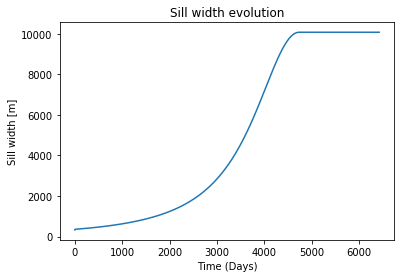

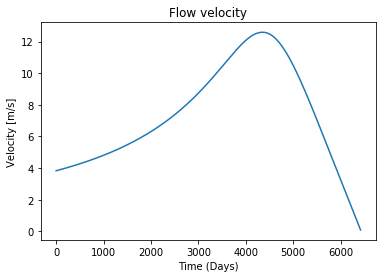

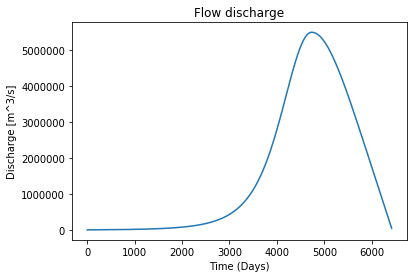

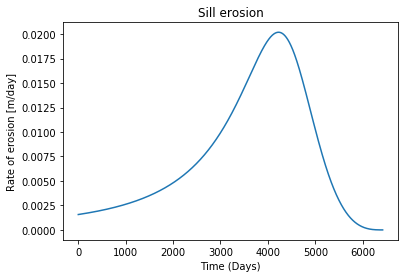

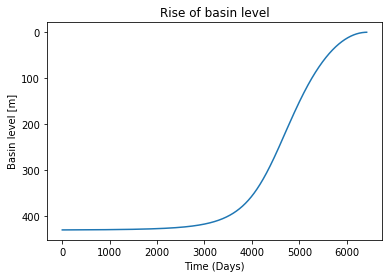

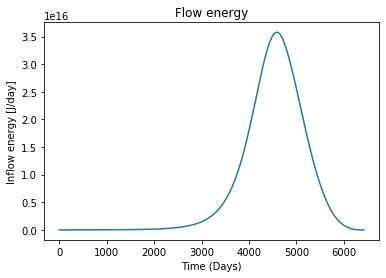

In [5]:

#Stage 3    
while SL_eMed<=430:
    if SL_eMed>0:
        
        Slope = SL_wMed/L
        
        [AreaSill, Rh, v_wMed, Q, Shear, Erate, Qd] = Calc_common_parameters(Wsill,Z0,DMar,g,D_sill,Slope,Kb,a)
        HypsometryWholemed = np.loadtxt(fname="Hypsometry_Stage3_Refilling.txt")
        
        KEwMed = 0.5*Q*v_wMed**2*1027*3600*24
    
        Vbrine3 = Vbrine3+Qd
        # correct sea-level calculation
        for i0,jw,kw,je,ke,j0,k0 in HypsometryWholemed: # i0 = depth, jw = area wMed, kw = volume wMed, je = area eMed
                                                        # ke = volume eMed, j0/k0 = total area/volume above Sicily sill
            x0.append(k0)
            y0.append(j0)
    
            if Vbrine3<k0:
                z = z-((Vbrine3-x0[-2])/j0)
                x0=[]
                y0=[]
                break
            else:
                z=i0
    
        SL_wMed = z  # Daily sea-level
        SL_eMed = SL_wMed
        
        Wsill=Kw*(Q**Aw)
        
            
        if Ar_SWd[-1]<Wsill:
            Wsill = Wsill
            
        elif Ar_SWd[-1]>Wsill:
            Wsill = Ar_SWd[-1]
            
        [Ar_SWd,Ar_t,Ar_VwM,Ar_dis,Ar_eR,Ar_SLw,Ar_KEw]=append_parameters(Wsill,t,v_wMed,Q,Erate,SL_wMed,KEwMed)

        t = t+1

        if D_sill<240:
            D_sill = D_sill+(Erate/365) 
        else:
            D_sill = 240
            

    elif SL_wMed==0:
        break
 
    
    if SL_wMed<0.01:
        
        break
    
plt.figure()
plt.title('Sill width evolution')
plt.ylabel('Sill width [m]')
plt.xlabel('Time (Days)')
plt.plot(Ar_t[1:],Ar_SWd[1:])
plt.figure()
plt.title('Flow velocity')
plt.ylabel('Velocity [m/s]')
plt.xlabel('Time (Days)')
plt.plot(Ar_t[1:],Ar_VwM[1:])
plt.figure()
plt.title('Flow discharge')
plt.ylabel('Discharge [m^3/s]')
plt.xlabel('Time (Days)')
plt.plot(Ar_t[1:],Ar_dis[1:])
plt.figure()
plt.title('Sill erosion')
plt.ylabel('Rate of erosion [m/day]')
plt.xlabel('Time (Days)')
plt.plot(Ar_t[1:],Ar_eR[1:])
plt.figure()
plt.title('Rise of basin level')
plt.ylabel('Basin level [m]')
plt.xlabel('Time (Days)')
plt.plot(Ar_t[1:],Ar_SLw[1:])
plt.gca().invert_yaxis()
plt.figure()
plt.title('Flow energy')
plt.ylabel('Inflow energy [J/day]')
plt.xlabel('Time (Days)')
plt.plot(Ar_t[1:],Ar_KEw[1:])

np.savetxt("SensitivityTest_wMed_flow_KE.txt", np.array(Ar_KEw), fmt="%s") 
np.savetxt("SensitivityTest_SL_rise_wMed.txt", np.array(Ar_SLw), fmt="%s") 
np.savetxt("SensitivityTest_Discharge.txt", np.array(Ar_dis), fmt="%s") 
#np.savetxt("SensitivityTest_wMed_velocity.txt", np.array(Ar_VwM), fmt="%s") 
